(1830, 1830, 3)
(3348900, 3)


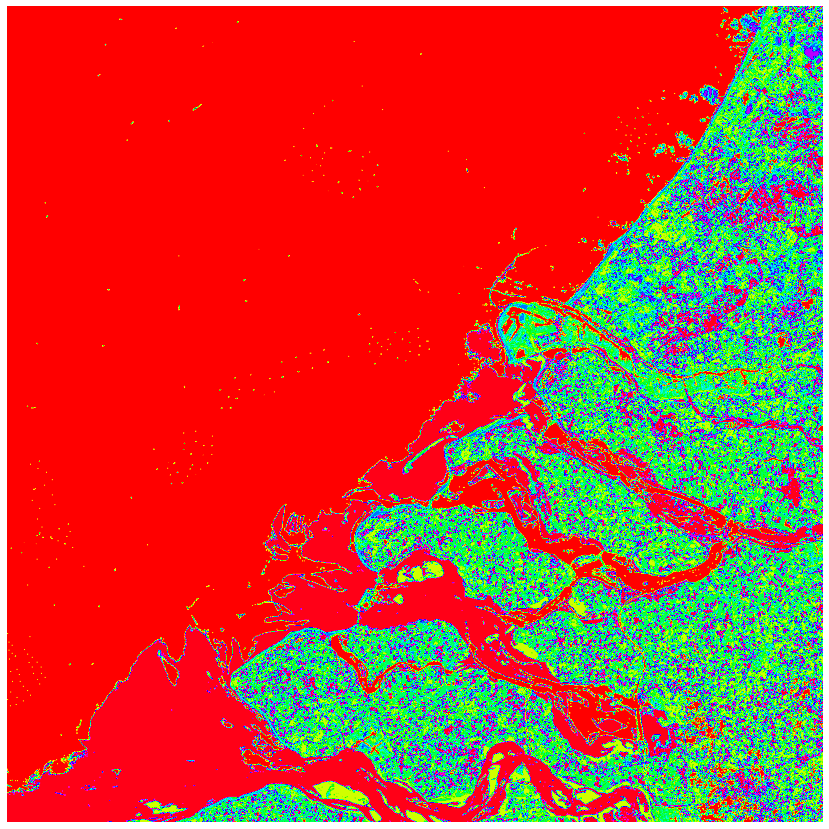

In [1]:
# Georgios Triantafyllou 5381738
import rasterio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

b2 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B02_60m.jp2')

b3 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B03_60m.jp2')

b4 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B04_60m.jp2')

b8 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B8A_60m.jp2')


B2 = np.empty((b2.height, b2.width, b2.count), b2.meta['dtype'])
B3 = np.empty((b2.height, b2.width, b2.count), b2.meta['dtype'])
B4 = np.empty((b2.height, b2.width, b2.count), b2.meta['dtype'])
for band in range(B2.shape[2]):
    B2[:,:,band] =  b2.read(band+1)
    B3[:,:,band] =  b3.read(band+1)
    B4[:,:,band] =  b4.read(band+1)
RGB = np.dstack((B2,B3,B4))
print (RGB.shape)

img1d=RGB[:,:,:3].reshape((RGB.shape[0]*RGB.shape[1],RGB.shape[2]))
print (img1d.shape)

cl = cluster.KMeans(n_clusters=6) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(RGB[:,:,0].shape) # reshape labels to a 3d array (one band only)

plt.figure(figsize=[20,15])
plt.imshow(img_cl, cmap='hsv')
plt.axis('off')
plt.savefig("RGB.jpg", bbox_inches='tight')
plt.show()

(1830, 1830, 3)
(3348900, 3)


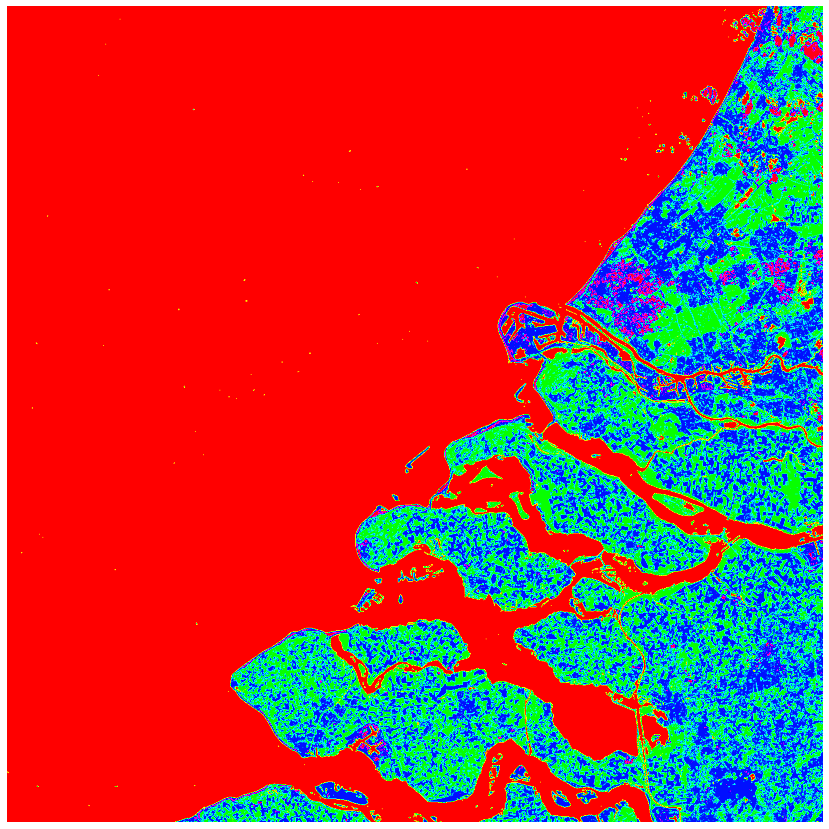

In [16]:
b2 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B02_60m.jp2')

b3 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B03_60m.jp2')

b4 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B04_60m.jp2')

b8 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B8A_60m.jp2')


B2 = np.empty((b2.height, b2.width, b2.count), b2.meta['dtype'])
# B3 = np.empty((b3.height, b3.width, b3.count), b3.meta['dtype'])
B4 = np.empty((b4.height, b4.width, b4.count), b4.meta['dtype'])
B8A = np.empty((b8.height, b8.width, b8.count), b8.meta['dtype'])
for band in range(B2.shape[2]):
    B2[:,:,band] =  b2.read(band+1)
    # B3[:,:,band] =  b3.read(band+1)
    B4[:,:,band] =  b4.read(band+1)
    B8A[:,:,band] =  b8.read(band+1)
RGB = np.dstack((B4,B2,B8A))
print (RGB.shape)

img1d=RGB[:,:,:3].reshape((RGB.shape[0]*RGB.shape[1],RGB.shape[2]))
print (img1d.shape)

cl = cluster.KMeans(n_clusters=4) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(RGB[:,:,0].shape) # reshape labels to a 3d array (one band only)

plt.figure(figsize=[20,15])
plt.imshow(img_cl, cmap='hsv')
plt.axis('off')
plt.savefig("RGB.jpg", bbox_inches='tight')
plt.show()

(1830, 1830, 3)
(3348900, 3)


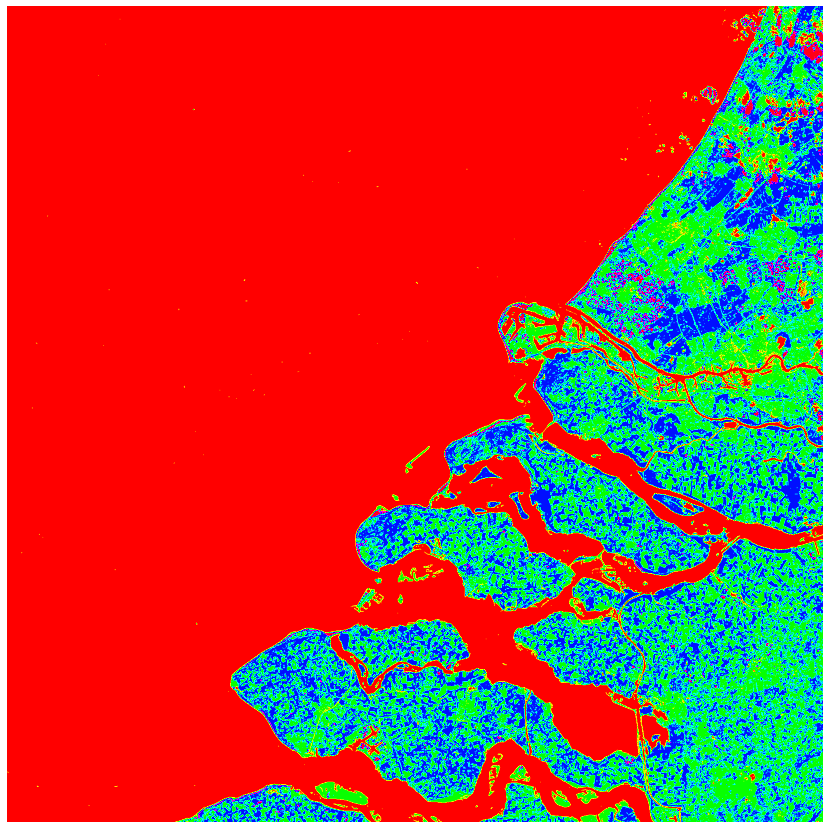

In [17]:
b2 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B02_60m.jp2')

b3 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B03_60m.jp2')

b4 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B04_60m.jp2')

b8 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B8A_60m.jp2')


# B2 = np.empty((b2.height, b2.width, b2.count), b2.meta['dtype'])
B3 = np.empty((b3.height, b3.width, b3.count), b3.meta['dtype'])
B4 = np.empty((b4.height, b4.width, b4.count), b4.meta['dtype'])
B8A = np.empty((b8.height, b8.width, b8.count), b8.meta['dtype'])
for band in range(B2.shape[2]):
    # B2[:,:,band] =  b2.read(band+1)
    B3[:,:,band] =  b3.read(band+1)
    B4[:,:,band] =  b4.read(band+1)
    B8A[:,:,band] =  b8.read(band+1)
RGB = np.dstack((B4,B3,B8A))
print (RGB.shape)

img1d=RGB[:,:,:3].reshape((RGB.shape[0]*RGB.shape[1],RGB.shape[2]))
print (img1d.shape)

cl = cluster.KMeans(n_clusters=4) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(RGB[:,:,0].shape) # reshape labels to a 3d array (one band only)

plt.figure(figsize=[20,15])
plt.imshow(img_cl, cmap='hsv')
plt.axis('off')
plt.savefig("RGB.jpg", bbox_inches='tight')
plt.show()

(1830, 1830, 3)
(3348900, 3)


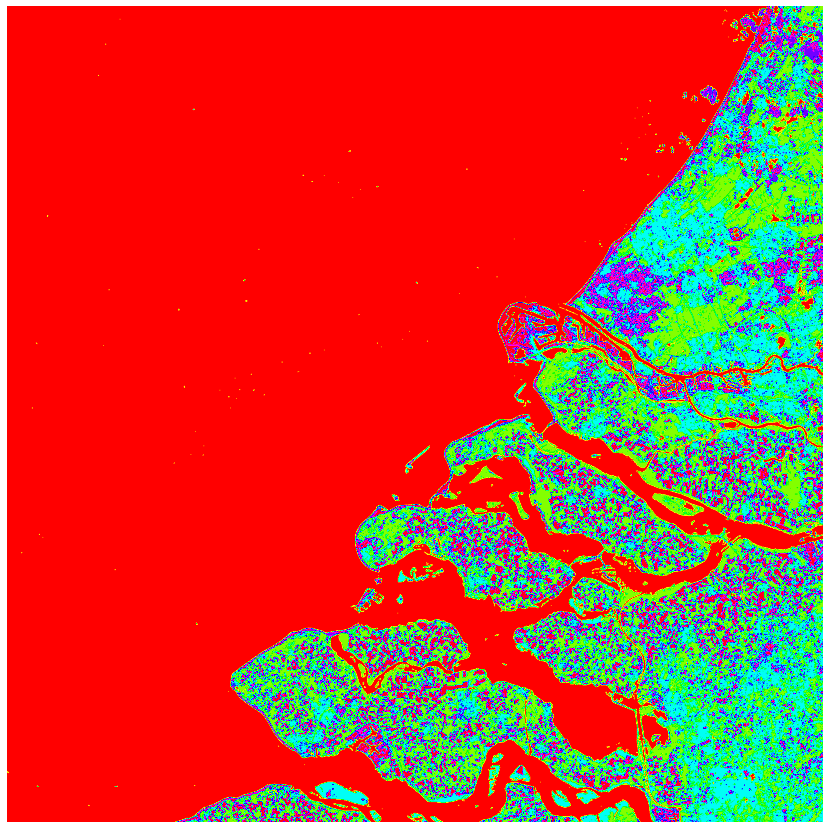

In [18]:
b2 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B02_60m.jp2')

b3 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B03_60m.jp2')

b4 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B04_60m.jp2')

b8 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B8A_60m.jp2')


B2 = np.empty((b2.height, b2.width, b2.count), b2.meta['dtype'])
# B3 = np.empty((b3.height, b3.width, b3.count), b3.meta['dtype'])
B4 = np.empty((b4.height, b4.width, b4.count), b4.meta['dtype'])
B8A = np.empty((b8.height, b8.width, b8.count), b8.meta['dtype'])
for band in range(B2.shape[2]):
    B2[:,:,band] =  b2.read(band+1)
    # B3[:,:,band] =  b3.read(band+1)
    B4[:,:,band] =  b4.read(band+1)
    B8A[:,:,band] =  b8.read(band+1)
RGB = np.dstack((B4,B2,B8A))
print (RGB.shape)

img1d=RGB[:,:,:3].reshape((RGB.shape[0]*RGB.shape[1],RGB.shape[2]))
print (img1d.shape)

cl = cluster.KMeans(n_clusters=5) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(RGB[:,:,0].shape) # reshape labels to a 3d array (one band only)

plt.figure(figsize=[20,15])
plt.imshow(img_cl, cmap='hsv')
plt.axis('off')
plt.savefig("RGB.jpg", bbox_inches='tight')
plt.show()